# Importing libraries:

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset:

In [2]:
# import the dataset 
ds = pd.read_csv("D:\\Faculty\\MSP\\strokePrediction\\healthcare-dataset-stroke-data.csv")
# Displaying the head of the dataset
ds.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# the shape of the dataset
# 5110 rows
# 12 cols 
ds.shape

(5110, 12)

In [4]:
# let's describe our data statistically 
ds.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
# let's see the types of the attributes
ds.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

# Filling the missing values in the dataset:

In [6]:
# let's see the nulls in our dataset
ds.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# columns that contain null values (bmi - smoking_status)
ds.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status        True
stroke               False
dtype: bool

In [8]:
# How many null values in our dataset
ds.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [9]:
# sum of all null values
ds.isnull().sum().sum()

1745

In [10]:
!pip3 install -U scikit-learn

In [11]:
# put the dataset in an array 
# drop the id and stroke columns
datastroke = pd.read_csv('D:\\Faculty\\MSP\\strokePrediction\\healthcare-dataset-stroke-data.csv')
X = datastroke.iloc[:,1:11].values
X


array([['Male', 67.0, 0, ..., 228.69, 36.6, 'formerly smoked'],
       ['Female', 61.0, 0, ..., 202.21, nan, 'never smoked'],
       ['Male', 80.0, 0, ..., 105.92, 32.5, 'never smoked'],
       ...,
       ['Female', 35.0, 0, ..., 82.99, 30.6, 'never smoked'],
       ['Male', 51.0, 0, ..., 166.29, 25.6, 'formerly smoked'],
       ['Female', 44.0, 0, ..., 85.28, 26.2, nan]], dtype=object)

In [12]:
# replace the null values in bmi column by mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 8:9])
X[:, 8:9] = imputer.transform(X[:, 8:9])

In [13]:
# print the bmi column after filling the missing values
print(X[:, 8:9])

[[36.6]
 [28.893236911794666]
 [32.5]
 ...
 [30.6]
 [25.6]
 [26.2]]


In [14]:
# Printing the most frequent category in smoking_status column
datastroke['smoking_status'].mode()

0    never smoked
Name: smoking_status, dtype: object

In [15]:
# replace the null values in smoking_status column by mode
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X[:,9:10])
X[:,9:10] = imputer.transform(X[:,9:10])

In [16]:
# print the smoking_status column after filling the missing values

print(X[:,9:10])

[['formerly smoked']
 ['never smoked']
 ['never smoked']
 ...
 ['never smoked']
 ['formerly smoked']
 ['never smoked']]


In [17]:
# print the dataset
X

array([['Male', 67.0, 0, ..., 228.69, 36.6, 'formerly smoked'],
       ['Female', 61.0, 0, ..., 202.21, 28.893236911794666,
        'never smoked'],
       ['Male', 80.0, 0, ..., 105.92, 32.5, 'never smoked'],
       ...,
       ['Female', 35.0, 0, ..., 82.99, 30.6, 'never smoked'],
       ['Male', 51.0, 0, ..., 166.29, 25.6, 'formerly smoked'],
       ['Female', 44.0, 0, ..., 85.28, 26.2, 'never smoked']],
      dtype=object)

In [18]:
# fill the missing values in the dataset itself
datastroke['bmi'].fillna(datastroke['bmi'].mean(), inplace=True)
datastroke['smoking_status'].fillna(datastroke['smoking_status'].mode()[0], inplace=True)
datastroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Encoding the categorical columns in the dataset:

In [19]:
# How many category in stroke column
# patient had a stroke --> 1              patient had not a stroke --> 0
# Note that the data is unbalanced
datastroke['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [20]:
# checking that the dependent data are encoded in the form of 1 and 0
y = datastroke.iloc[:, -1].values
print(y)

[1 1 1 ... 0 0 0]


In [21]:
# checking datatypes we have 
# int and float are numerical by nature so we foucs on encoding the object and category types
datastroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [22]:
# To see only the categorical columns only
datastroke.select_dtypes(include=['O', 'category'])

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [23]:
# we did here a lable Encodeing 
# yes --> 1     no --> 0
ever_married_mapping = {'Yes' : 1, 'No' : 0}
datastroke['ever_married'] = datastroke['ever_married'].map(ever_married_mapping)
datastroke[['ever_married']]

,ever_married
0,1
1,1
2,1
3,1
4,1
...,...
5105,1
5106,1
5107,1
5108,1


In [24]:
# we did here a lable Encodeing 
# yes --> 1     no --> 0
datastroke['ever_married'].value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

In [25]:
# Encode categorical features using scikit-learn LabelEncoder
# example gender using sklearn
# male --> 1      female --> 0       other --> 2
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
datastroke['gender'] = encoder.fit_transform(datastroke['gender'])
datastroke[['gender']]

,gender
0,1
1,0
2,1
3,0
4,0
...,...
5105,0
5106,0
5107,0
5108,1


In [26]:
# Encode categorical features using scikit-learn LabelEncoder
# example gender using sklearn
# male --> 1      female --> 0      other --> 2
datastroke['gender'].value_counts()

0    2994
1    2115
2       1
Name: gender, dtype: int64

In [27]:
# How many category in work_type column
datastroke['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [28]:
# Encode categorical features using scikit-learn LabelEncoder
# example work_type using sklearn
# Never_worked --> 1      Govt_job --> 0       Private --> 2       Self-employed --> 3    children --> 4
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
datastroke['work_type'] = encoder.fit_transform(datastroke['work_type'])
datastroke[['work_type']]

,work_type
0,2
1,3
2,2
3,2
4,3
...,...
5105,2
5106,3
5107,3
5108,2


In [29]:
# Encode categorical features using scikit-learn LabelEncoder
# example work_type using sklearn
# Never_worked --> 1      Govt_job --> 0       Private --> 2       Self-employed --> 3    children --> 4
datastroke['work_type'].value_counts()

2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

In [30]:
# How many category in Residence_type column
datastroke['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [31]:
# Encode categorical features using scikit-learn LabelEncoder
# example Residence_type using sklearn
# Urban --> 1      Rural --> 0       
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
datastroke['Residence_type'] = encoder.fit_transform(datastroke['Residence_type'])
datastroke[['Residence_type']]

,Residence_type
0,1
1,0
2,0
3,1
4,0
...,...
5105,1
5106,1
5107,0
5108,0


In [32]:
# Encode categorical features using scikit-learn LabelEncoder
# example Residence_type using sklearn
# Urban --> 1      Rural --> 0       
datastroke['Residence_type'].value_counts()

1    2596
0    2514
Name: Residence_type, dtype: int64

In [33]:
# How many category in smoking_status column
datastroke['smoking_status'].value_counts()

never smoked       3436
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [34]:
# Encode categorical features using scikit-learn LabelEncoder
# example smoking_status using sklearn
# never smoked --> 1      formerly smoked --> 0       smokes --> 2
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
datastroke['smoking_status'] = encoder.fit_transform(datastroke['smoking_status'])
datastroke[['smoking_status']]

,smoking_status
0,0
1,1
2,1
3,2
4,1
...,...
5105,1
5106,1
5107,1
5108,0


In [36]:
# Encode categorical features using scikit-learn LabelEncoder
# example smoking_status using sklearn
# never smoked --> 1      formerly smoked --> 0       smokes --> 2
datastroke['smoking_status'].value_counts()

1    3436
0     885
2     789
Name: smoking_status, dtype: int64

In [37]:
# Printing the dataset after encoding
datastroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,0,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,1,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,2,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,1,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,1,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,1,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,0,0


In [38]:
# check if there is any other categorical or object columns
datastroke.select_dtypes(include=['O', 'category']).columns

Index([], dtype='object')

# Scaling the dataset:

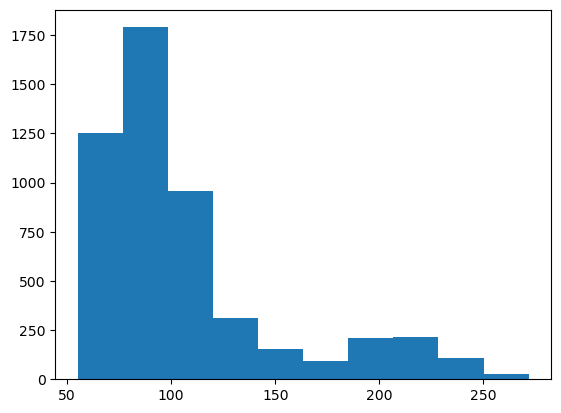

In [39]:
# Visualizing avg_glucose_level before scaling
fig = plt.hist(datastroke.avg_glucose_level)

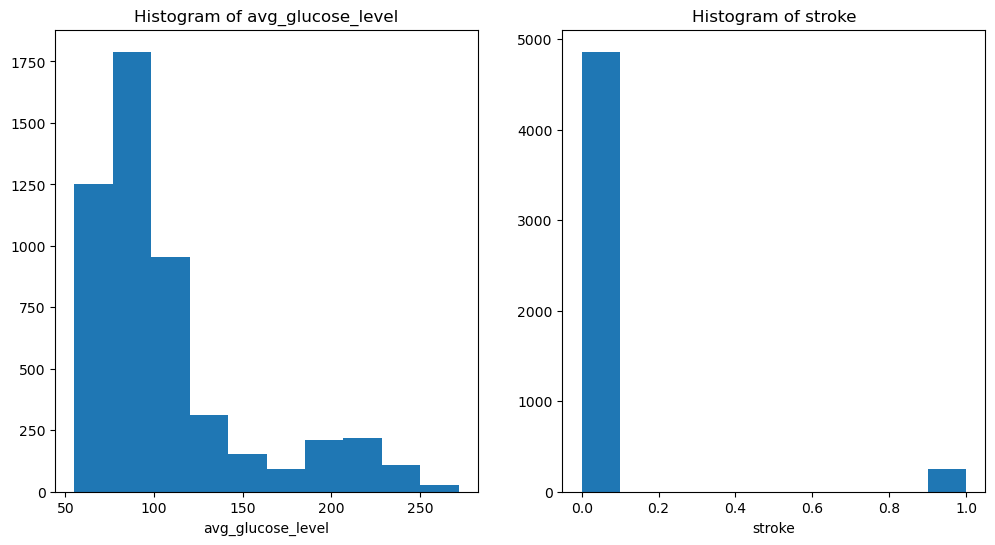

In [40]:
# Visualizing avg_glucose_level and stroke before scaling
fig = plt.figure(figsize=(12, 6))
avg_glucose_level = fig.add_subplot(121)
stroke = fig.add_subplot(122)

avg_glucose_level.hist(datastroke.avg_glucose_level, bins=10)
avg_glucose_level.set_xlabel('avg_glucose_level')
avg_glucose_level.set_title("Histogram of avg_glucose_level")

stroke.hist(datastroke.stroke, bins=10)
stroke.set_xlabel('stroke')
stroke.set_title("Histogram of stroke")

plt.show()

In [41]:
# Let's scale avg_glucose_level column using min_max_scaler
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(datastroke[['avg_glucose_level']])
sdf = pd.DataFrame(min_max_scaled_data, columns = ['avg_glucose_level'])
sdf



,avg_glucose_level
0,0.801265
1,0.679023
2,0.234512
3,0.536008
4,0.549349
...,...
5105,0.132167
5106,0.323516
5107,0.128658
5108,0.513203


In [42]:
# printing the max value of avg_glucose_level after scaling
sdf['avg_glucose_level'].max()


1.0

In [43]:
# printing the min value of avg_glucose_level after scaling
sdf['avg_glucose_level'].min()

0.0

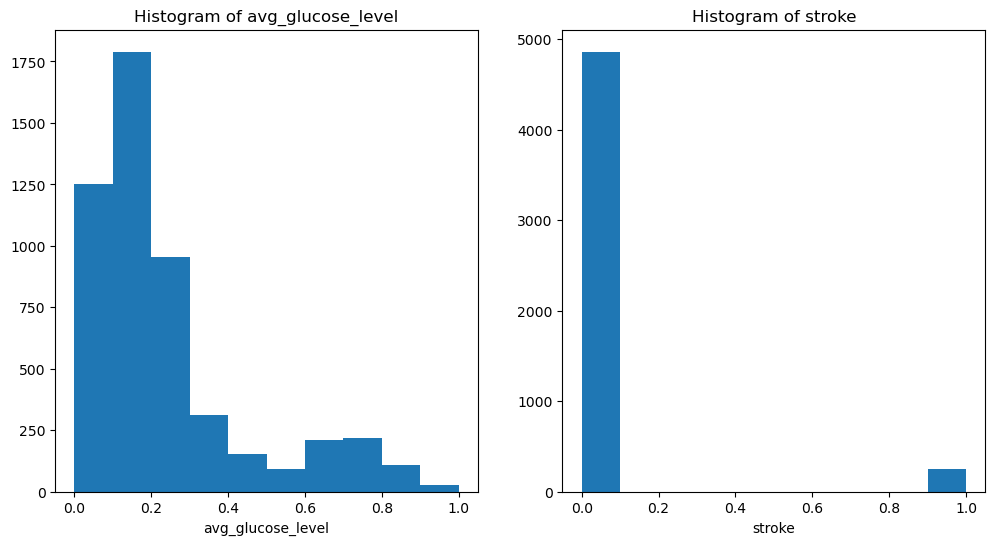

In [44]:
# Visualizing avg_glucose_level and stroke after scaling
fig = plt.figure(figsize=(12, 6))
avg_glucose_level = fig.add_subplot(121)
stroke = fig.add_subplot(122)

avg_glucose_level.hist(sdf.avg_glucose_level, bins=10)
avg_glucose_level.set_xlabel('avg_glucose_level')
avg_glucose_level.set_title("Histogram of avg_glucose_level")

stroke.hist(datastroke.stroke, bins=10)
stroke.set_xlabel('stroke')
stroke.set_title("Histogram of stroke")

plt.show()

In [45]:
# Let's scale age and bmi columns using StandardScaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(datastroke[['age', 'bmi']])
spf = pd.DataFrame(scaled_data, columns = ['age', 'bmi'])
spf

,age,bmi
0,1.051434,1.001234e+00
1,0.786070,4.615554e-16
2,1.626390,4.685773e-01
3,0.255342,7.154182e-01
4,1.582163,-6.357112e-01
...,...,...
5105,1.626390,4.615554e-16
5106,1.670617,1.442949e+00
5107,-0.363842,2.217363e-01
5108,0.343796,-4.278451e-01


In [46]:
# Display the dataset after scaling
datastrokescaled = datastroke
datastrokescaled.loc[:, ['avg_glucose_level']] = sdf[[ 'avg_glucose_level']]
datastrokescaled.loc[:, ['age' , 'bmi']] = spf[[ 'age' , 'bmi']]

datastrokescaled

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,1.051434,0,1,1,2,1,0.801265,1.001234e+00,0,1
1,51676,0,0.786070,0,0,1,3,0,0.679023,4.615554e-16,1,1
2,31112,1,1.626390,0,1,1,2,0,0.234512,4.685773e-01,1,1
3,60182,0,0.255342,0,0,1,2,1,0.536008,7.154182e-01,2,1
4,1665,0,1.582163,1,0,1,3,0,0.549349,-6.357112e-01,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,1.626390,1,0,1,2,1,0.132167,4.615554e-16,1,0
5106,44873,0,1.670617,0,0,1,3,1,0.323516,1.442949e+00,1,0
5107,19723,0,-0.363842,0,0,1,3,0,0.128658,2.217363e-01,1,0
5108,37544,1,0.343796,0,0,1,2,0,0.513203,-4.278451e-01,0,0


# Spliting the dataset to X features and y target:

In [47]:
# Split the data you have to X features and y target
# X is all columns except the target stroke
X =  datastrokescaled.drop(columns='stroke')
y = datastrokescaled['stroke']

In [48]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameters:
# - X: The feature data
# - y: The target variable
# - test_size: The proportion of the dataset to include in the test split (e.g., 0.2 for 20% test)
# - random_state: An optional random seed for reproducibility

# KNN model:

In [49]:
# Training the KNN model on the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
# Predict on a new dataset (e.g., your test data)
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
# Calculate accuracy for KNN model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, Y_pred)
print(f'Accuracy: {accuracy:.5f}')

Accuracy: 0.93836


# Building the confusion matrix for KNN model:

In [52]:
# Making the confusion matrix for KNN model
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Y_pred )
print(cm)
accuracy_score(y_test, Y_pred)

[[959   1]
 [ 62   0]]


0.9383561643835616

<Axes: >

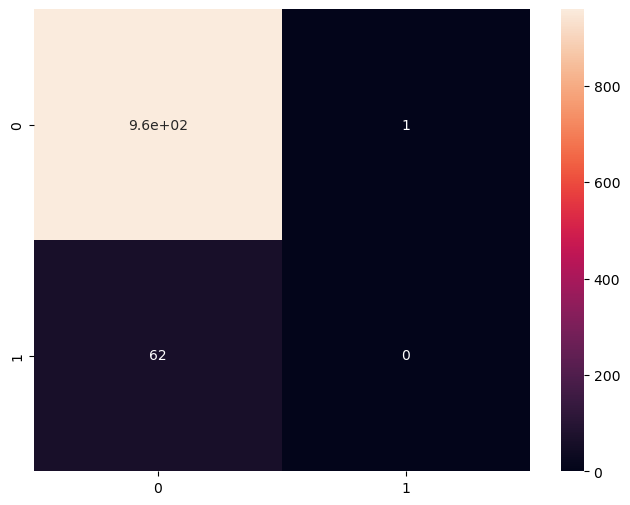

In [53]:
# visualizing the confusion matrix in numbers
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)


<Axes: >

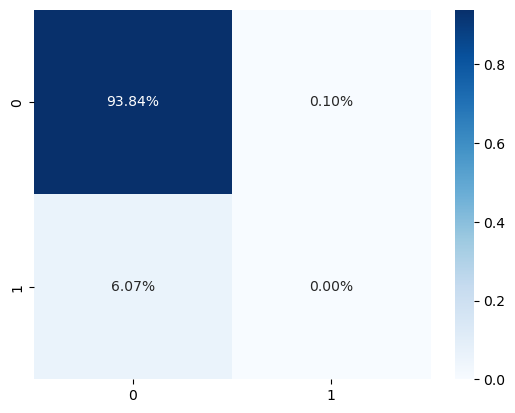

In [54]:
# visualizing the confusion matrix in percentage
sns.heatmap(cm/np.sum(cm), annot=True, 
           fmt='.2%', cmap='Blues')


<Axes: >

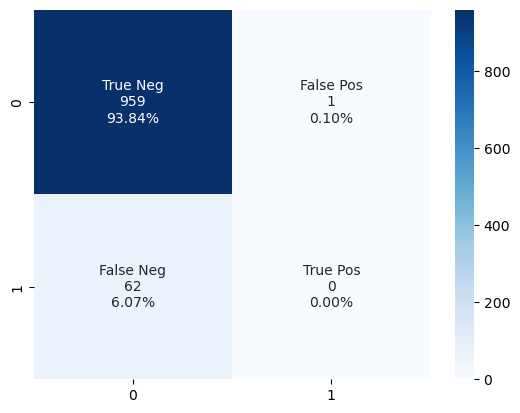

In [55]:
# visualizing the confusion matrix in both numbers and percentage
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')


# ROC curve (Reciever Operating Characteristic) to show the trade off between True positive and false positive:

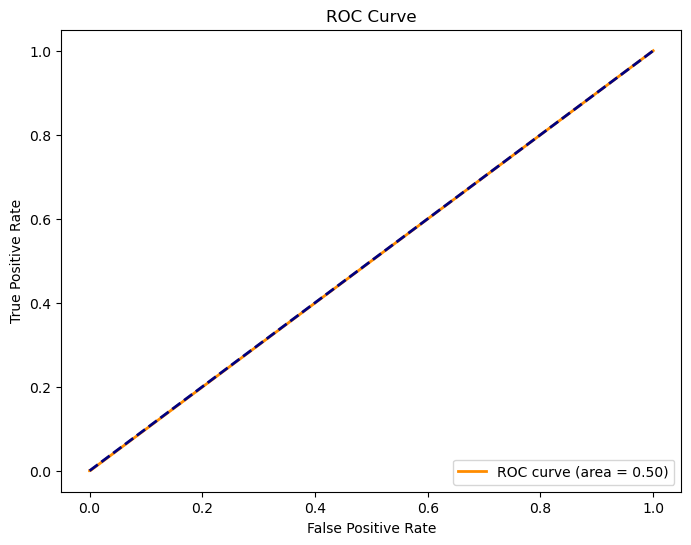

In [56]:
# Visualizing the dataset after performing the model 
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, Y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Naive bayes model:

In [57]:
# Training the naive bayes model on the training set
from sklearn.naive_bayes import GaussianNB
classifier2 = GaussianNB()
classifier2.fit(X_train, y_train)

GaussianNB()

In [58]:
# Predict on a new dataset (e.g., your test data)
Y_pred2 = classifier2.predict(X_test)
Y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
# Calculate accuracy for naive bayes model
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y_test, Y_pred2)
print(f'Accuracy: {accuracy2:.5f}')

Accuracy: 0.93933


# Building the confusion matrix for Naive bayes model:

In [60]:
# Making the confusion matrix for naive bayes model
from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(y_test, Y_pred2 )
print(cm2)
accuracy_score(y_test, Y_pred2)

[[960   0]
 [ 62   0]]


0.9393346379647749

<Axes: >

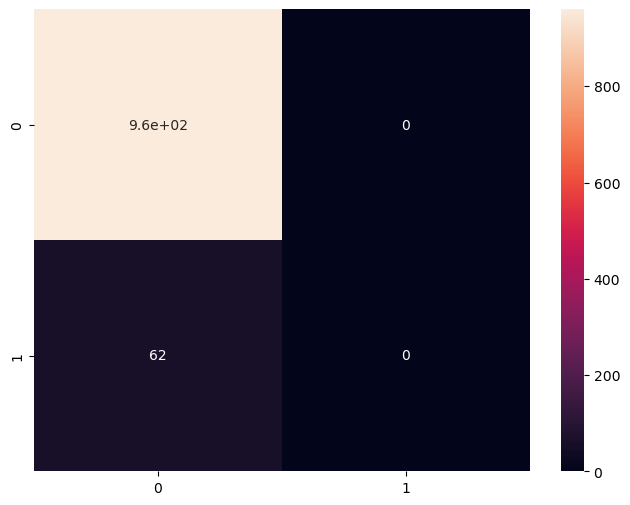

In [61]:
# visualizing the confusion matrix in numbers
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm2, annot=True)

<Axes: >

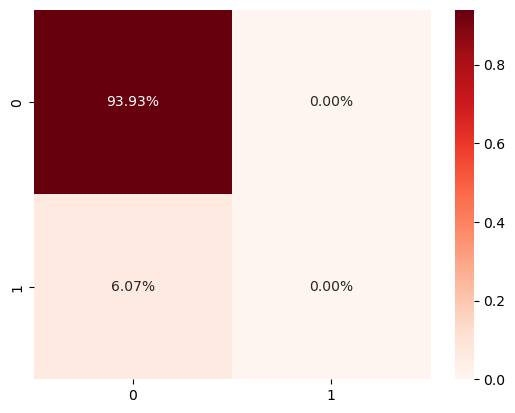

In [62]:
# visualizing the confusion matrix in percentage
sns.heatmap(cm2/np.sum(cm2), annot=True, 
           fmt='.2%', cmap='Reds')

<Axes: >

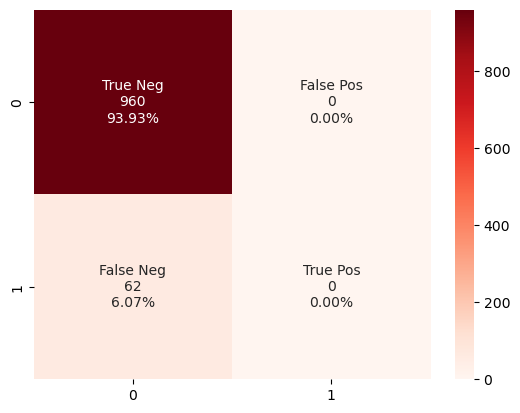

In [63]:
# visualizing the confusion matrix in both numbers and percentage
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm2.flatten()/np.sum(cm2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm2, annot=labels, fmt='', cmap='Reds')

# Dataset oversampling (stroke column) to improve the confusion matrix:

<Axes: title={'center': 'count (target)'}>

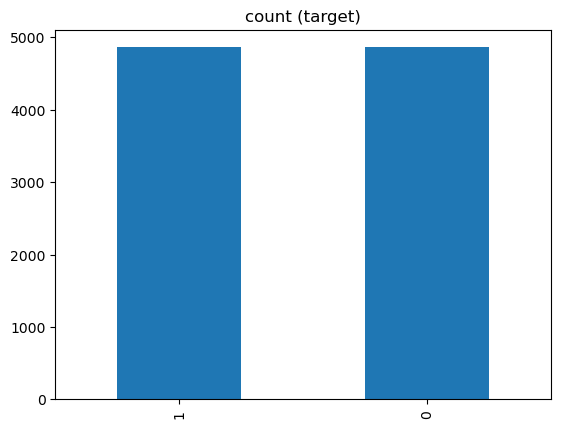

In [64]:
# Dataset oversampling 
# To improve the confusion matrix
count_class_zero, count_class_one = datastrokescaled.stroke.value_counts()

df_class_one = datastrokescaled[datastrokescaled['stroke'] == 1]
df_class_zero = datastrokescaled[datastrokescaled['stroke'] == 0]

from sklearn.utils import resample 
df_class_no_upsampled = resample(df_class_one, replace = True, n_samples = count_class_zero, random_state = 42)

df_upsampled = pd.concat([df_class_no_upsampled, df_class_zero])
df_upsampled.stroke.value_counts().plot(kind='bar', title='count (target)')

In [65]:
# Printing the data after oversampling
df_upsampled

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
102,45277,0,1.361026,0,0,1,2,0,0.814745,7.414014e-01,0,1
179,65105,1,1.670617,0,0,1,2,1,0.729850,-3.628870e-01,1,1
92,66315,0,0.609161,0,0,0,3,1,0.059551,1.118159e+00,1,1
14,5317,0,1.582163,0,1,1,2,1,0.733866,-9.006276e-02,1,1
106,42072,0,0.299569,1,0,1,2,0,0.083372,1.827614e-01,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,1.626390,1,0,1,2,1,0.132167,4.615554e-16,1,0
5106,44873,0,1.670617,0,0,1,3,1,0.323516,1.442949e+00,1,0
5107,19723,0,-0.363842,0,0,1,3,0,0.128658,2.217363e-01,1,0
5108,37544,1,0.343796,0,0,1,2,0,0.513203,-4.278451e-01,0,0


# Spliting the dataset after oversampling:

In [66]:
# Split the data you have to X features and y target
# X is all columns except the target stroke
X3 =  df_upsampled.drop(columns='stroke')
y3 = df_upsampled['stroke']

In [67]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=32)

# Parameters:
# - X: The feature data
# - y: The target variable
# - test_size: The proportion of the dataset to include in the test split (e.g., 0.2 for 20% test)
# - random_state: An optional random seed for reproducibility

# KNN model after oversampling:

In [68]:
# Training the KNN model on the training set
from sklearn.neighbors import KNeighborsClassifier
classifier3 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier3.fit(X_train3, y_train3)

KNeighborsClassifier()

In [69]:
# Predict on a new dataset (e.g., your test data)
Y_pred3 = classifier3.predict(X_test3)
Y_pred3

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [70]:
# Calculate accuracy for KNN model
from sklearn.metrics import accuracy_score
accuracy3 = accuracy_score(y_test3, Y_pred3)
print(f'Accuracy: {accuracy3:.5f}')

Accuracy: 0.92031


# Building the confusion matrix for KNN model after oversampling:

In [71]:
# Making the confusion matrix for KNN model
from sklearn.metrics import confusion_matrix, accuracy_score
cm3 = confusion_matrix(y_test3, Y_pred3 )
print(cm3)
accuracy_score(y_test3, Y_pred3)

[[822 155]
 [  0 968]]


0.9203084832904884

<Axes: >

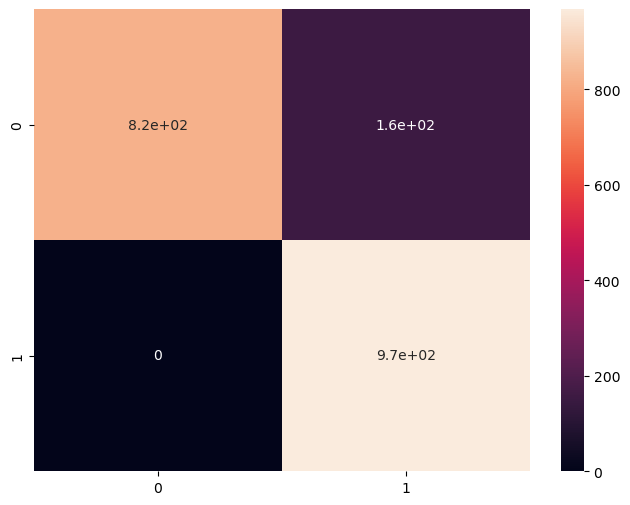

In [72]:
# visualizing the confusion matrix in numbers
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm3, annot=True)

<Axes: >

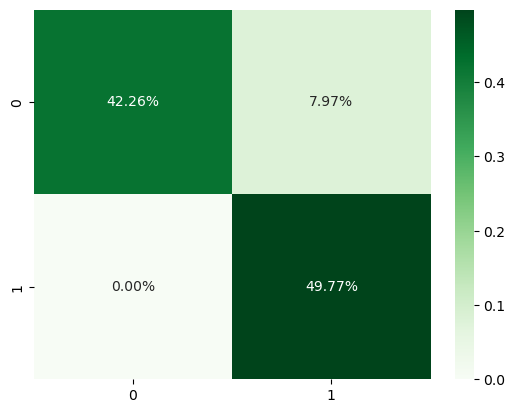

In [73]:
# visualizing the confusion matrix in percentage
sns.heatmap(cm3/np.sum(cm3), annot=True, 
           fmt='.2%', cmap='Greens')

<Axes: >

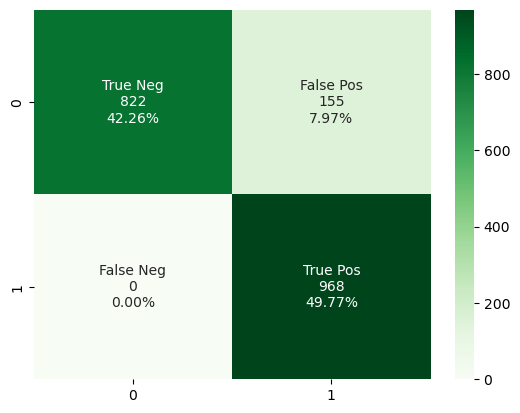

In [74]:
# visualizing the confusion matrix in both numbers and percentage
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm3.flatten()/np.sum(cm3)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm3, annot=labels, fmt='', cmap='Greens')

# cheking the precision and recall after oversampling:

In [75]:
# cheking the precision and recall after data oversampling
from sklearn.metrics import classification_report

print(classification_report(y_test3, Y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       977
           1       0.86      1.00      0.93       968

    accuracy                           0.92      1945
   macro avg       0.93      0.92      0.92      1945
weighted avg       0.93      0.92      0.92      1945



# ROC curve (Reciever Operating Characteristic) to show the trade off between True positive and false positive:

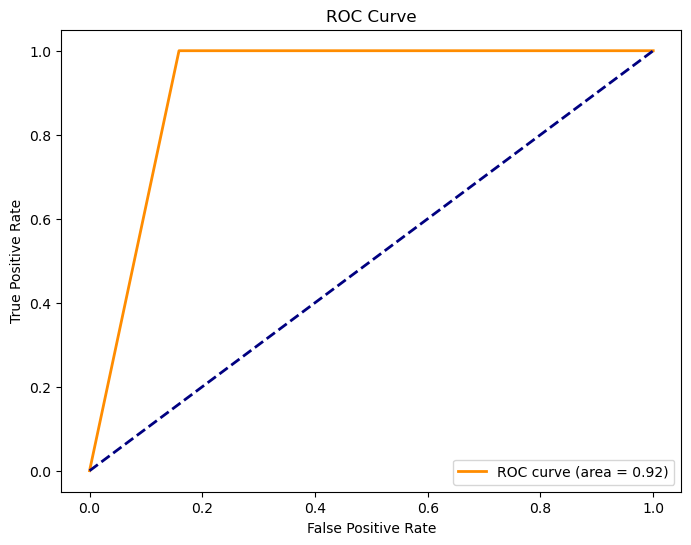

In [76]:
# Visualizing the dataset after performing the model 
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test3, Y_pred3)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Naive bayes model after oversampling:

In [77]:
# Training the naive bayes model on the training set
from sklearn.naive_bayes import GaussianNB
classifier4 = GaussianNB()
classifier4.fit(X_train3, y_train3)

GaussianNB()

In [78]:
# Predict on a new dataset (e.g., your test data)
Y_pred4 = classifier4.predict(X_test3)
Y_pred4

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [79]:
# Calculate accuracy for naive bayes model
from sklearn.metrics import accuracy_score
accuracy4 = accuracy_score(y_test3, Y_pred4)
print(f'Accuracy: {accuracy4:.5f}')

Accuracy: 0.75219


# Building the confusion matrix for naive bayes model after oversampling:

In [80]:
# Making the confusion matrix for naive bayes model
from sklearn.metrics import confusion_matrix, accuracy_score
cm4 = confusion_matrix(y_test3, Y_pred4 )
print(cm4)
accuracy_score(y_test3, Y_pred4)

[[594 383]
 [ 99 869]]


0.752185089974293